# Uncertainty and Statistical Significance

### PS 3 Week 6 Discussion - Clara Hu



--------

Today, we'll look at the data on final scores in a large undergraduate class where students were randomly assigned to attend tutoring. The final scores for all of the students in the course were recorded and participation in tutoring was noted. 

-------

**Data Dictionary/Codebook**

`Mentored`: `TRUE` = student participated in tutoring, `FALSE` = student did not participate in tutoring

`Final`: student score on final

--------


In [1]:
# Run this cell. 
library(estimatr)
scores <- read.csv("data/final_scores.csv")
head(scores)

,Mentored,Final
,<lgl>,<dbl>
1,FALSE,82
2,FALSE,82
3,FALSE,82
4,FALSE,82
5,FALSE,82
6,TRUE,82


## Uncertainty

How did students do on the Final? Since we have all of the data, I can just take the average of that column (we have all of the information, and this number is set). 

In [2]:
mean(scores$Final) # The average score was 62%

[1] 62.43841

In [3]:
sd(scores$Final) # Std Dev of scores was 25%

[1] 25.71275

Now, imagine that I am only able to get data for 50 students. I randomly sampled 50 students and asked them for the difference in their final scores. (We are treating the entire dataset/class as the population, and the 50 students as the sample. 

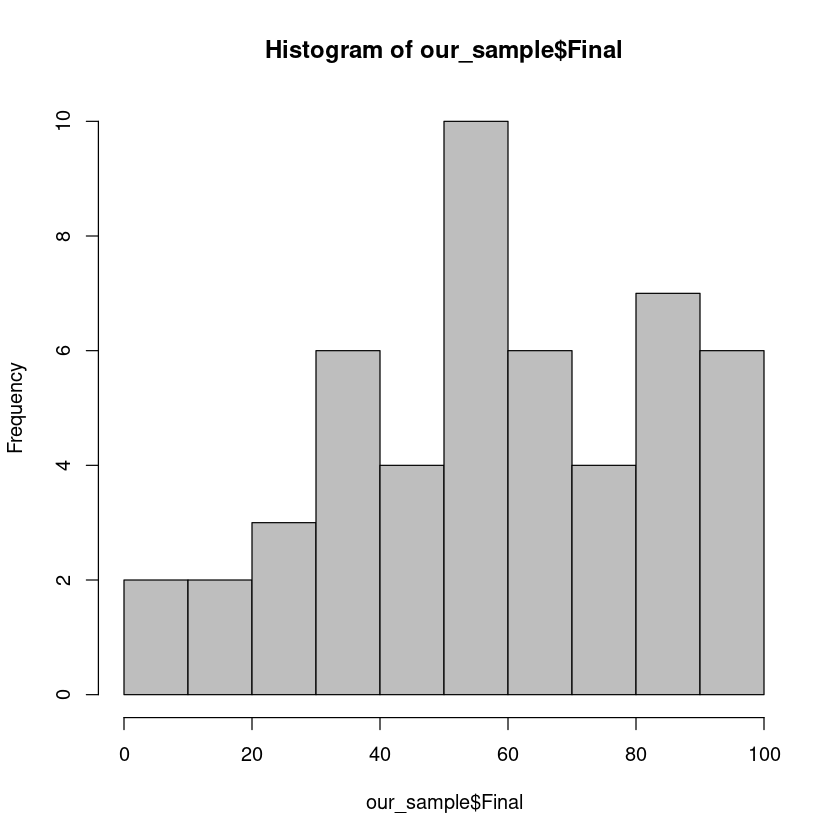

In [4]:
set.seed(101)
our_sample <- scores[sample(1:nrow(scores), 50, replace = FALSE),] # sample 50 students without replacement
hist(our_sample$Final, col = "gray")

In [5]:
# What's the standard deviation of the Final score for our 50 students?
sd(our_sample$Final)
# and the mean of 50 students:
mean(our_sample$Final)

[1] 25.15137

[1] 58.98

Compare this to the mean of all of the students in the dataset! 

If we did this 1000 times, what are all of the potential outcomes? Let's take a look at the first 10:

In [6]:
#Run this cell, you do not need to understand the code here
samples <- list()
sample_means <- array()

for(i in c(1:1000)){
    samples[i] <- list(scores[sample(1:nrow(scores), 50, replace = FALSE),]) # sample 50 students without replacement
    sample_means[i] <- mean(samples[[i]]$Final) # calculate their average score
}

head(sample_means, 10)

[1] 59.12 62.52 66.14 61.00 60.49 59.16 65.19 62.55 65.12 68.40

In [7]:
# Here's the range of outcomes we got with 1000 different samples:
min(sample_means)
max(sample_means)

[1] 49.52

[1] 75.15

**Uncertainty** is measured by the amount of error/noise in an estimate of the mean or average value.

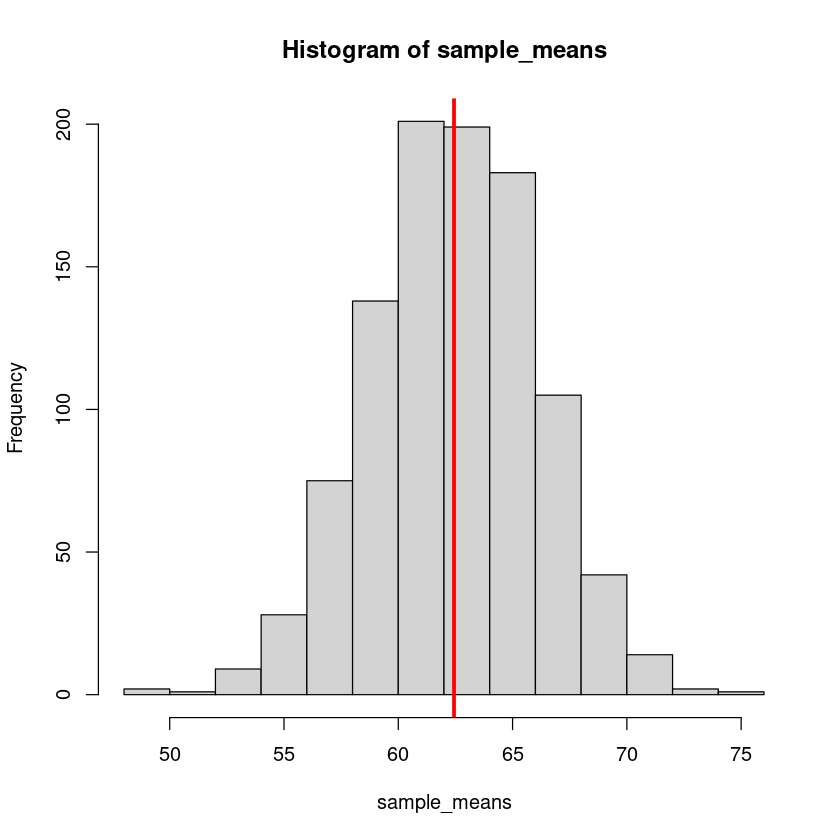

In [8]:
# In a graphical format
hist(sample_means)
abline(v = mean(scores$Final), col = "red", lwd = 3)

## Standard Error

What is the standard error of the samples above? Let's find the standard error using the first sample of Final scores we took (`our_sample$Final`).

$$Standard Error = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

In [9]:
s1 <- sd(our_sample[!our_sample$Mentored,]$Final) #standard dev for not tutored
s2 <- sd(our_sample[our_sample$Mentored,]$Final) #standard dev for tutored
n1 <- length(our_sample[!our_sample$Mentored,]$Final) # sample size of not tutored
n2 <- length(our_sample[our_sample$Mentored,]$Final) #sample size of tutored

std_error <- sqrt((s1^2/n1) + s2^2/n2) #mathematically calculate
std_error

[1] 5.971965

What does the value we got for the standard error tell us?

## Statistical Significance

Back to our original question: Did receiving tutoring affect student performance on the Final? 

**Null Hypothesis:** Tutoring had no effect on Final Scores- scores for students who did not receive tutoring were the same as scores for students who did receive tutoring.  
**Alternative Hypothesis:** Tutoring did have an effect on Final Scores- scores for students who did not receive tutoring were different from scores for students who did receive tutoring.

### t- statistic

The t-statistic describes how likely an estimate of the size we saw would arise by chance even if there is no treatment effect.

Let's compare the average Final score for the students that were tutored in our sample of 50 students to the sample distribution of means if there were no treatment effect (not tutored).

In [10]:
#Finding the average Final performance for the students that were tutored in our sample
mean_sample_tutored = mean(our_sample[our_sample$Mentored,]$Final)
mean_sample_tutored #our estimate from the sample

[1] 74.95

In [11]:
#Finding means Final score for students not tutored in samples
#Run this cell, you do not need to understand the code here

no_effect_means <- array() 
no_effect_scores <- numeric(0)
for(i in c(1:1000)){
    no_effect_means[i] <- mean(samples[[i]][!samples[[i]]$Mentored,]$Final)
    no_effect_scores = c(no_effect_scores, samples[[i]][!samples[[i]]$Mentored,]$Final)
}

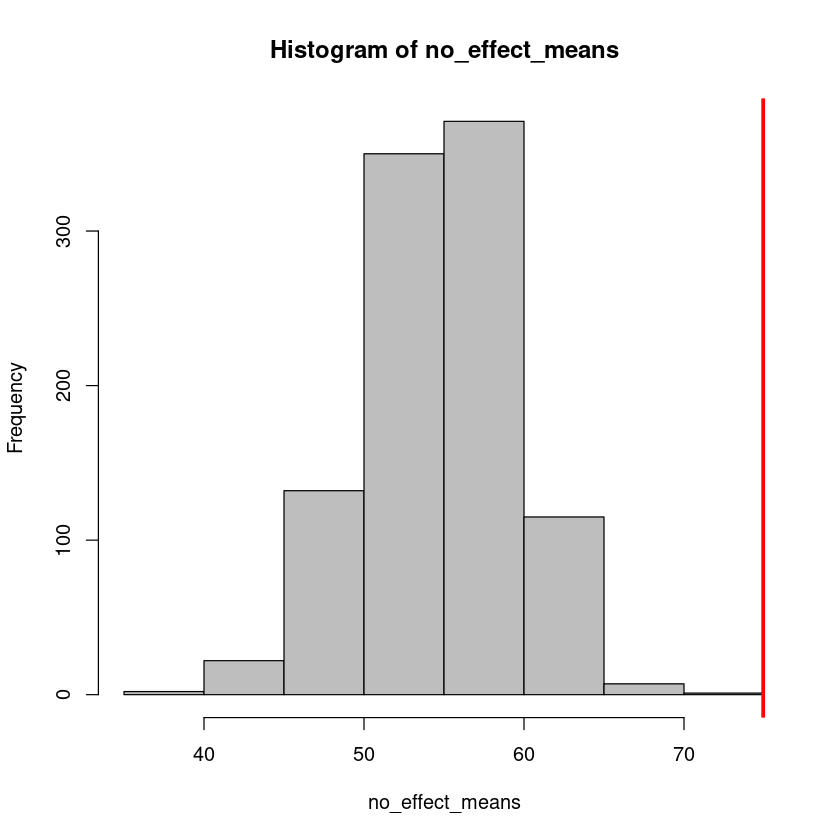

In [12]:
#Visualize our results
hist(no_effect_means, col = "gray")#, xlim = range(40, 75))
abline(v = mean_sample_tutored, col = "red", lwd = 3)

**What does the histogram above tell us about the hypotheses?** 

Let's confirm by finding the t-statistic.

$$ t = \frac{estimate}{SE} $$

The estimate in this case is the difference in the Final score between the two groups (tutored & not tutored)

In [18]:
# We already have the mean for the tutored students (mean_sample_tutored)
# First, find the mean for the students who were not tutored in our sample
mean_not_tutored <- mean(our_sample[!our_sample$Mentored,]$Final)

estimate <- mean_sample_tutored - mean_not_tutored #find estimate
t_statistic <- estimate / std_error #find t_statistic

estimate #print estimate
t_statistic #print t-statistic
std_error*t_statistic

[1] 26.61667

[1] 4.456936

[1] 26.61667

What does our t-statistic tell us about the effect of our treatment?

### Using the difference_in_means() function

Today's exercise so far was simply to show the statistical intuition behind statistical processes! In practice, we'll use the `difference_in_means()` function to calculate the effect, t-score, standard error, and p-value. 

**Let's compare the results we calculated for `our_sample` to the results evaluated using `difference_in_means()`**

In [14]:
difference_in_means(Final ~ Mentored, our_sample, condition1 = FALSE, condition2 = TRUE)

Design:  Standard 
         Estimate Std. Error  t value     Pr(>|t|) CI Lower CI Upper       DF
Mentored 26.61667   5.971965 4.456936 5.239275e-05 14.59814 38.63519 46.34496

**Now lets take a look at the `difference_in_means` for the entire `scores` dataset.**

In [15]:
difference_in_means(Final ~ Mentored, scores, condition1 = FALSE, condition2 = TRUE)

Design:  Standard 
         Estimate Std. Error  t value     Pr(>|t|) CI Lower CI Upper       DF
Mentored 18.70845   1.180301 15.85057 1.684749e-52 16.39327 21.02363 1526.994

**Let's interpret the results.** 

What is the treatment effect? Standard Error? t-statistic? p-value?

What do the t-statistic and p-value tell us about the treatment effect? Why? 

*Take notes here*